## EDA 09-05-25

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
df = pd.read_csv("Gold_data.csv")
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [6]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [7]:
print("Shape of the dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())

Shape of the dataset: (2182, 1)

Column names: ['price']

Data types:
 price    float64
dtype: object

Missing values:
 price    0
dtype: int64

First 5 rows:
               price
date               
2016-01-01  2252.60
2016-01-02  2454.50
2016-01-03  2708.10
2016-01-04  2577.80
2016-01-05  2597.75


In [8]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
              price
count  2182.000000
mean   3284.450046
std     719.564434
min    2252.600000
25%    2697.020000
50%    2879.800000
75%    4147.325000
max    4966.300000


In [9]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 306


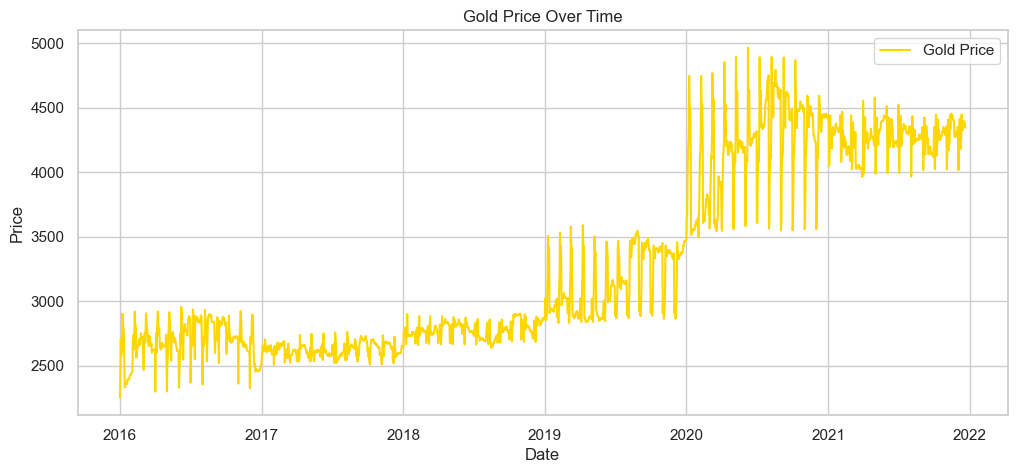

In [10]:
# Line plot
plt.figure(figsize=(12, 5))
plt.plot(df['price'], label='Gold Price', color='gold')
plt.title("Gold Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

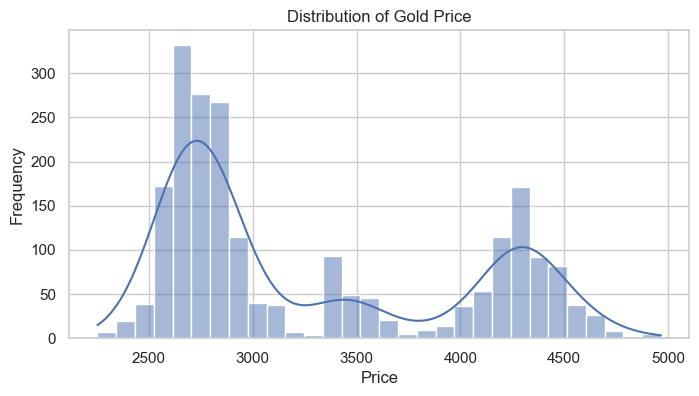

In [11]:
# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Gold Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


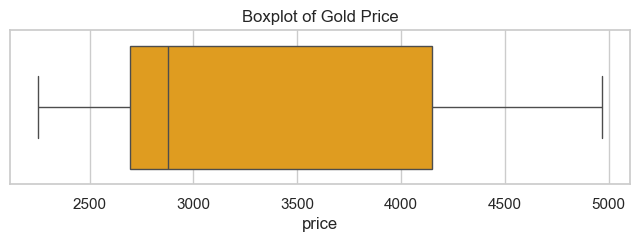

In [12]:
# Boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['price'], color='orange')
plt.title("Boxplot of Gold Price")
plt.show()

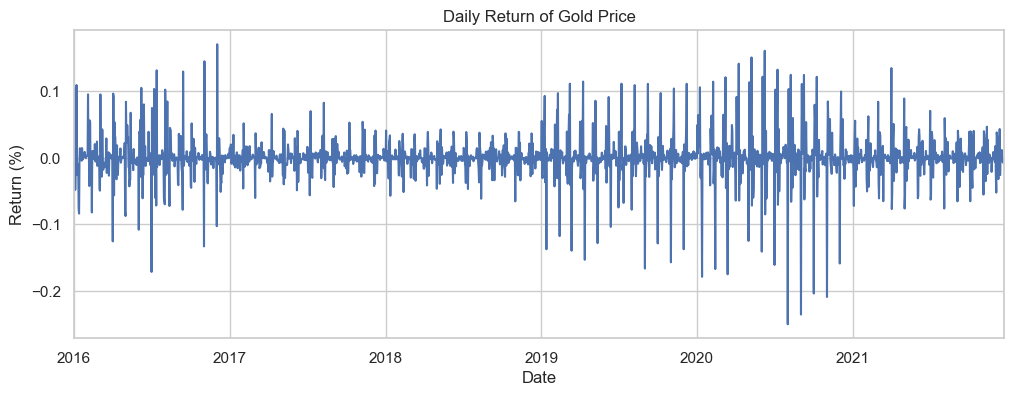

In [13]:
# Daily returns
df['daily_return'] = df['price'].pct_change()

plt.figure(figsize=(12, 4))
df['daily_return'].plot()
plt.title("Daily Return of Gold Price")
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.grid(True)
plt.show()

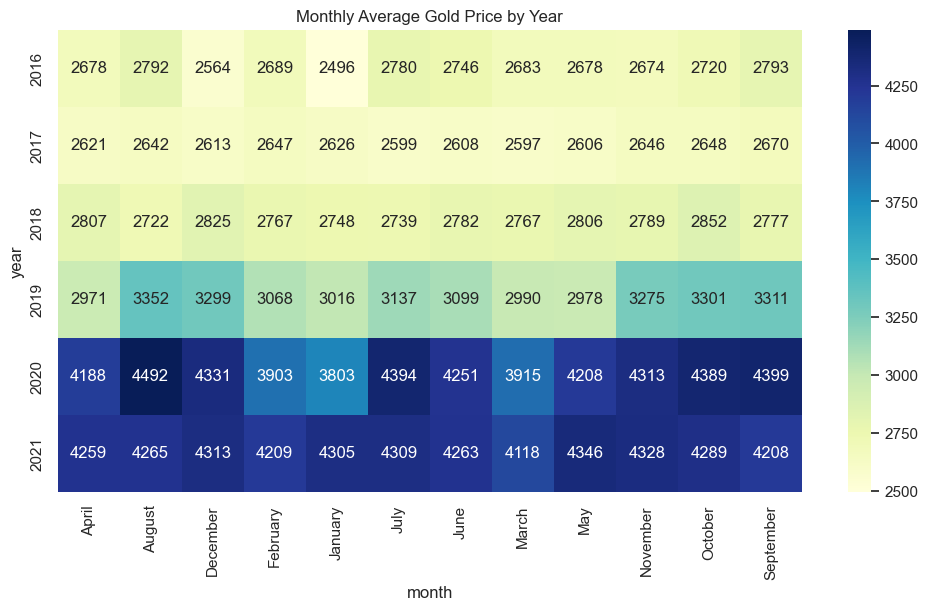

In [14]:
df['year'] = df.index.year
df['month'] = df.index.month_name()

pivot = df.pivot_table(values='price', index='year', columns='month', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Average Gold Price by Year")
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_3676\1779813392.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['price'].resample('M').mean()


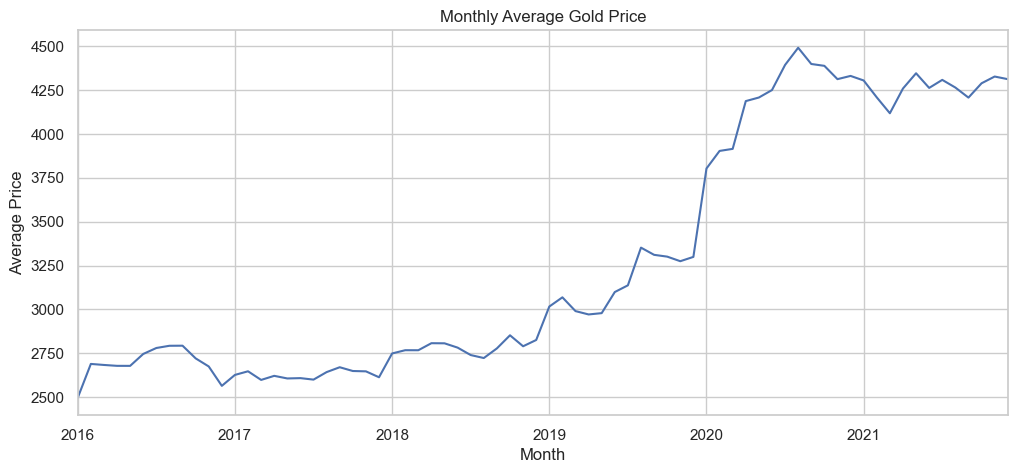

In [15]:
monthly_avg = df['price'].resample('M').mean()

plt.figure(figsize=(12, 5))
monthly_avg.plot()
plt.title("Monthly Average Gold Price")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

## Model Buiding 16-05-25

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [18]:
# Load the data
df = pd.read_csv("Gold_data.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df['year'] = df['date'].dt.year

In [19]:
# Split into training (2020) and testing (2021)
train_df = df[df['year'] == 2020].copy()
test_df = df[df['year'] == 2021].copy()

In [20]:
# Set date as index for time series
train_ts = train_df.set_index('date')['price']
test_ts = test_df.set_index('date')['price']

In [21]:
# Fit ARIMA model
model = ARIMA(train_ts, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [22]:
# Forecast for the test period
n_forecast = len(test_ts)
forecast = model_fit.forecast(steps=n_forecast)

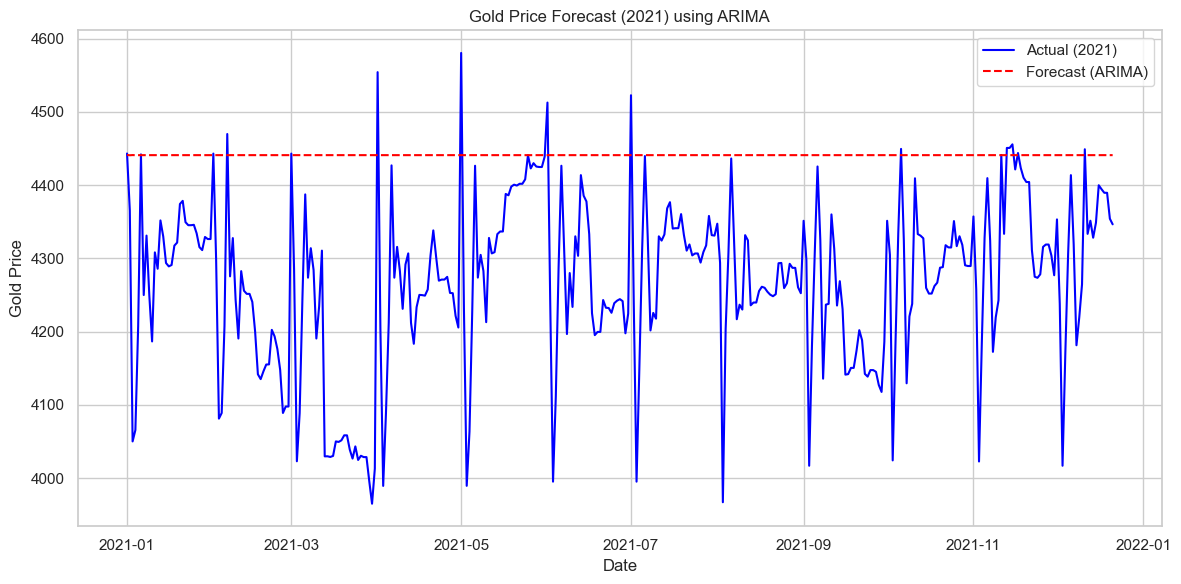

In [23]:

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(test_ts.index, test_ts, label='Actual (2021)', color='blue')
plt.plot(test_ts.index, forecast, label='Forecast (ARIMA)', color='red', linestyle='--')
plt.title("Gold Price Forecast (2021) using ARIMA")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Calculate evaluation metrics
mse = mean_squared_error(test_ts, forecast)
r2 = r2_score(test_ts, forecast)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 43215.37
R² Score: -2.3401


## Model Evaluation

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Load and prepare data
df = pd.read_csv("Gold_data.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df['year'] = df['date'].dt.year

In [29]:
# Split data into training (2020) and test (2021)
train_df = df[df['year'] == 2020].copy()
test_df = df[df['year'] == 2021].copy()

In [30]:
# Convert to time series format
train_ts = train_df.set_index('date')['price']
test_ts = test_df.set_index('date')['price']

In [31]:
# Fit ARIMA model (basic order, can be tuned)
model = ARIMA(train_ts, order=(1, 1, 1))
model_fit = model.fit()

C:\Users\akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [32]:
# Forecast for test period (2021)
n_forecast = len(test_ts)
forecast = model_fit.forecast(steps=n_forecast)

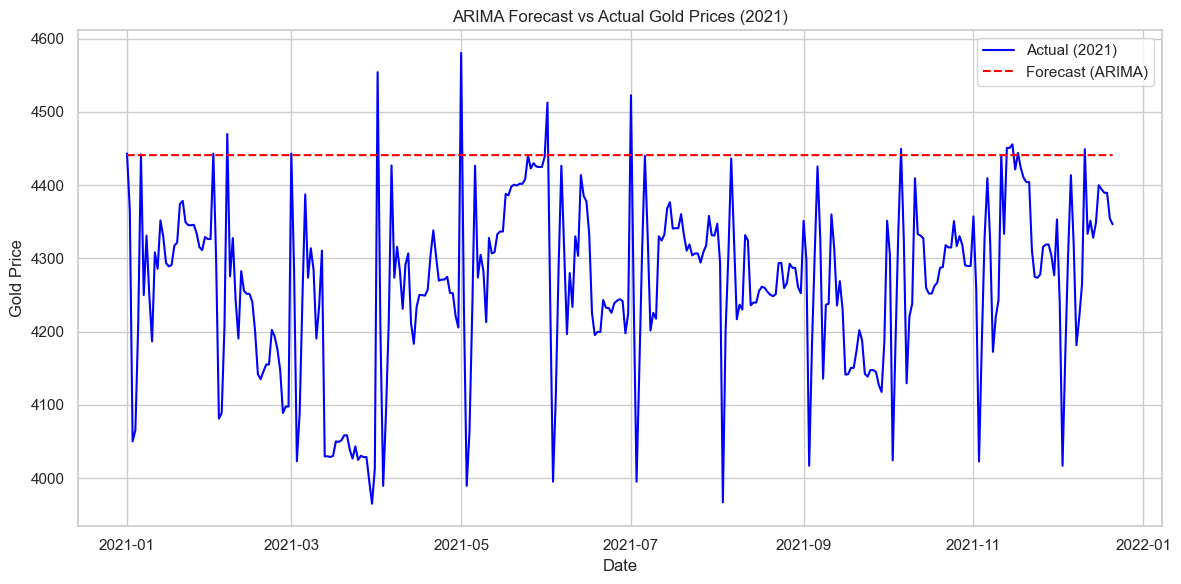

In [33]:
# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(test_ts.index, test_ts, label='Actual (2021)', color='blue')
plt.plot(test_ts.index, forecast, label='Forecast (ARIMA)', color='red', linestyle='--')
plt.title("ARIMA Forecast vs Actual Gold Prices (2021)")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model
mse = mean_squared_error(test_ts, forecast)
rmse = mse ** 0.5
mae = mean_absolute_error(test_ts, forecast)
r2 = r2_score(test_ts, forecast)

print("📊 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


📊 Model Evaluation Metrics:
Mean Absolute Error (MAE): 176.80
Mean Squared Error (MSE): 43215.37
Root Mean Squared Error (RMSE): 207.88
R² Score: -2.3401


## Deployment

In [39]:
# Converting 'date' to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [41]:
# Seting date as index
df.set_index('date', inplace=True)

In [43]:
# Creating lag features (e.g., use previous day's price to predict current price)
df['price_lag1'] = df['price'].shift(1)
df.dropna(inplace=True)  # drop first row with NaN lag

In [45]:
# Train-test split: by using 80% of the data for training, 20% for testing
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

In [47]:
# Defining features and target
X_train = train[['price_lag1']]
y_train = train['price']
X_test = test[['price_lag1']]
y_test = test['price']

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
# Training Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
import pickle

In [61]:
# Save model
with open("gold_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved as gold_price_model.pkl")

✅ Model saved as gold_price_model.pkl


### Link for the App

In [3]:
https://gold-prediction-app-chdgyjtwed3exasgnyvyvv.streamlit.app/

SyntaxError: invalid syntax (2713594134.py, line 1)